In [18]:
import plaidml.keras
plaidml.keras.install_backend()
from tensorflow.keras import backend
from tensorflow.python.keras import backend
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [19]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../dataset/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '../dataset/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [4]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [5]:
train_generator.filenames[0]

'circle\\circle001.png'

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_________________________________________________________________


# 모델 그래프로 보기
- conda install pydot
- conda install graphviz

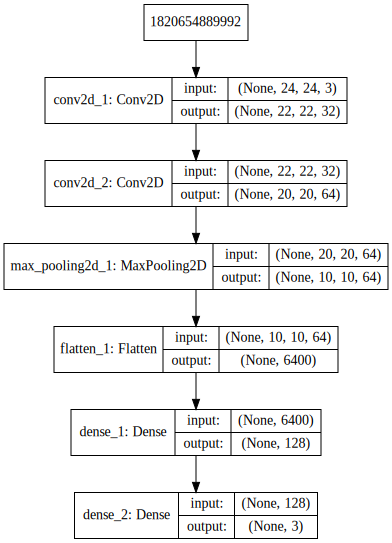

In [7]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 3s 226ms/step - loss: 1.0270 - acc: 0.5778 - val_loss: 1.0848 - val_acc: 0.6000
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.2278 - acc: 0.9778 - val_loss: 0.8622 - val_acc: 0.6667
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0210 - acc: 1.0000 - val_loss: 1.6089 - val_acc: 0.7333
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9149 - val_acc: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 8.0446e-04 - acc: 1.0000 - val_loss: 2.3910 - val_acc: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 4.5189e-04 - acc: 1.0000 - val_loss: 1.5340 - val_acc: 0.6667
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 3.0288e-04 - acc: 1.0000 - val_loss: 2.1996 - val_acc: 0.6000
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 2.3

In [11]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 66.67%


In [12]:
scores[0], scores[1]

(1.9413915872573853, 0.6666666805744171)

In [13]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.130 0.000 0.870]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.595 0.381 0.024]
 [1.000 0.000 0.000]
 [0.001 0.000 0.999]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.035 0.001 0.965]
 [0.000 0.008 0.992]
 [0.003 0.043 0.954]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]]


In [14]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
for i in range(len(test_generator.labels)):
    print(test_generator.filenames[i], test_generator.labels[i], np.argmax(output[i]))

circle\circle016.png 0 0
circle\circle017.png 0 2
circle\circle018.png 0 2
circle\circle019.png 0 2
circle\circle020.png 0 0
circle\circle021.png 0 0
circle\circle022.png 0 2
circle\circle023.png 0 1
circle\circle024.png 0 2
circle\circle025.png 0 2
rectangle\rectangle016.png 1 2
rectangle\rectangle017.png 1 2
rectangle\rectangle018.png 1 2
rectangle\rectangle019.png 1 1
rectangle\rectangle020.png 1 0


IndexError: index 15 is out of bounds for axis 0 with size 15